In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

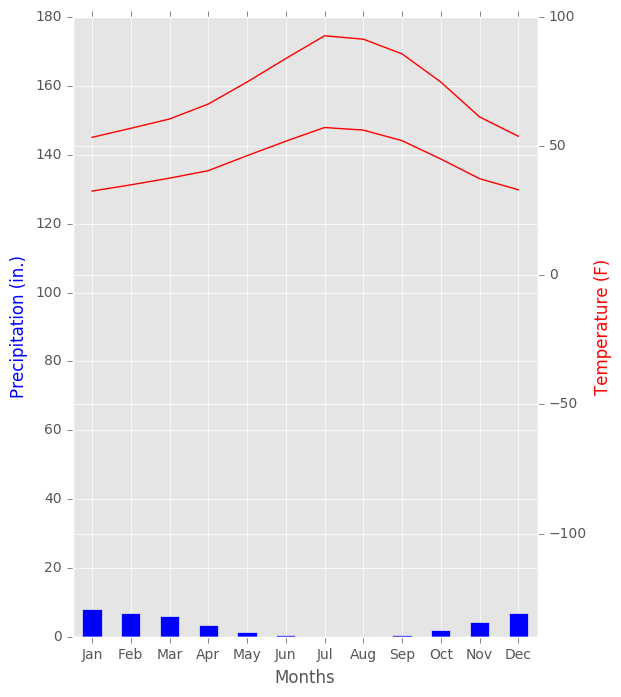

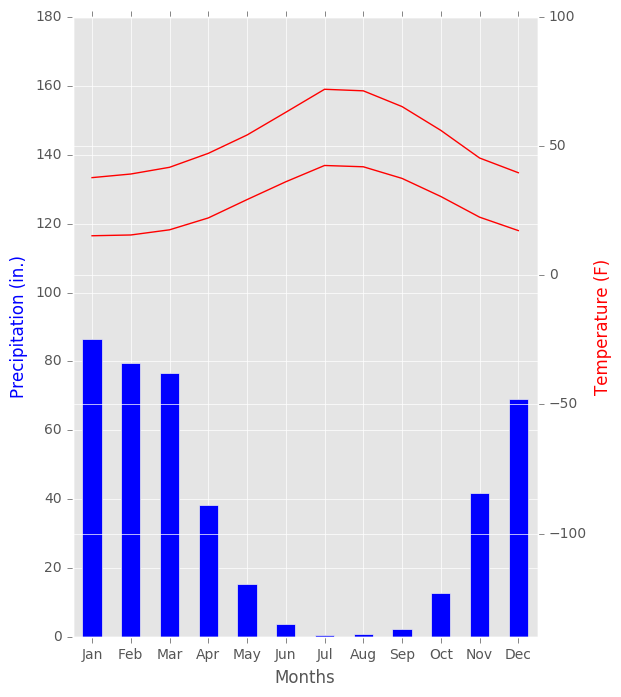

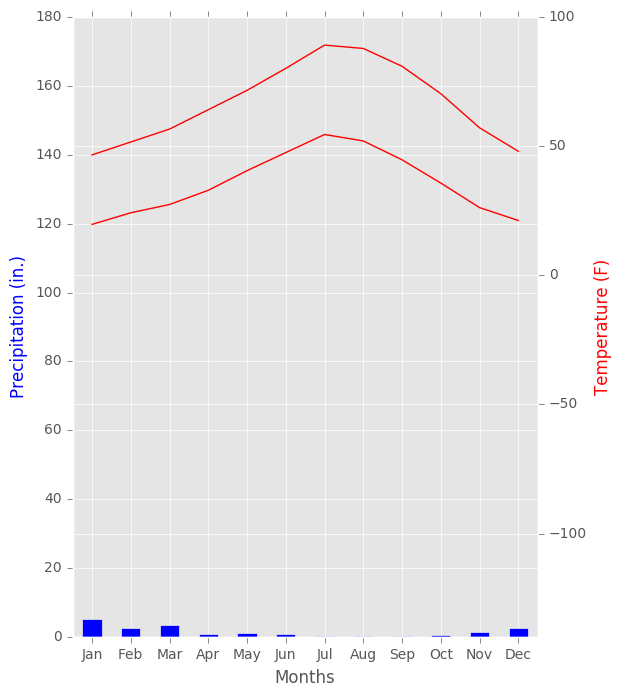

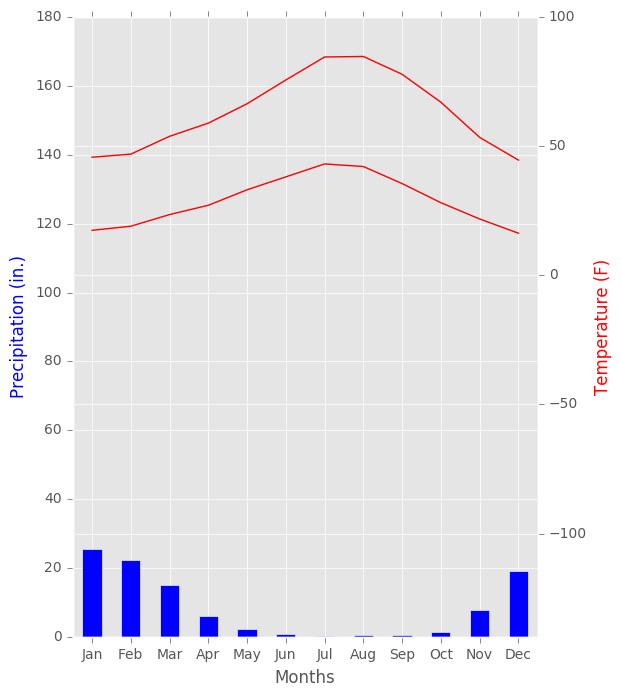

In [28]:
avg_temp = []
temp_range=[]
precip=[]
# titles=["Placerville", "Twin Lakes", "Markleeville", "Wellington"]  

for idx, sheetname in list(enumerate(['Sheet2', 'Sheet3', 'Sheet4', 'Sheet10'])):
    orig_placer= pd.read_excel("OrographicLifting.xlsx", sheetname =sheetname)
    placer=orig_placer
    
    #calculate info
    avg_temp.append((orig_placer["Annual"][0] + orig_placer["Annual"][1])/2)
    temp_range.append(placer.iloc[0].max() - placer.iloc[1].min())
    placer.iloc[2]=(orig_placer.loc["Average Total Precipitation (in.)"]
                    + orig_placer.loc["Average Total SnowFall (in.)"])
    placer = orig_placer.drop(["Average Total SnowFall (in.)", "Average Snow Depth (in.)"], axis=0)
    precip.append(placer.iloc[2].loc["Annual"])
    
    #begin graphing
    placer = orig_placer.drop(["Annual"], axis=1)    
    #laying the first axes 
    x = list(range(12))
    xticks = list(placer)
    fig, ax1 = plt.subplots(figsize=(6, 8))
    #first axes contains the precipitation + snowfall
    s1 = placer.iloc[2]
    plt.bar(x, s1, width=0.5, color="blue", align="center")
    plt.xlabel('Months')
    plt.ylabel('Precipitation (in.)', color='b')
    plt.xticks(x,xticks)
    plt.xlim(min(x),max(x))
#     plt.ylim([0,s1.max()*8]) different y-axes
    plt.ylim([0, 180])

    #laying the second axes, contains the temperature
    ax2 = ax1.twinx() #review
    s2 = placer.iloc[0] 
    s3 = placer.iloc[1]
    plt.plot(x,s2, 'r')
    plt.plot(x,s3, 'r')
    plt.ylabel('Temperature (F)', color = 'r')
    plt.xlim(min(x)-0.5,max(x)+0.5)
    plt.ylim([-140,100])

    #drawing 0 degrees line
#     plt.plot(x, np.zeros_like(x), 'k--')
    plt.savefig('climograph{}.png'.format(sheetname), bbox_inches='tight')
#     plt.suptitle(titles[idx], fontsize=12)
    plt.show()


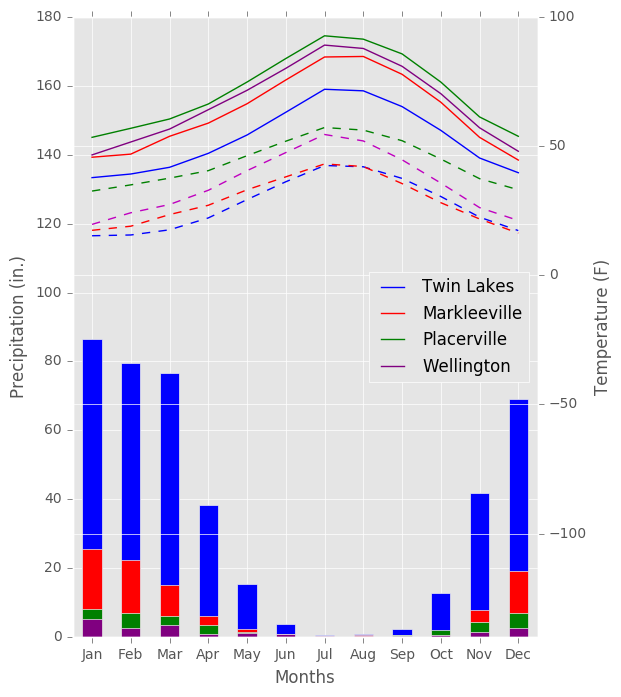

In [29]:
colors=["blue", "red", "green", "purple"]
colors_dash=["b", "r", "g", "m"]


for idx, sheetname in list(enumerate(['Sheet3', 'Sheet10', 'Sheet2', 'Sheet4'])):
    orig_placer= pd.read_excel("OrographicLifting.xlsx", sheetname =sheetname)
    placer=orig_placer
    placer.iloc[2]=(orig_placer.loc["Average Total Precipitation (in.)"]
                    + orig_placer.loc["Average Total SnowFall (in.)"])
    placer = orig_placer.drop(["Average Total SnowFall (in.)", "Average Snow Depth (in.)"], axis=0)
    placer = orig_placer.drop(["Annual"], axis=1)    
    
    #laying the first axes 
    if idx==0:
        x = list(range(12))
        xticks = list(placer)
        fig, ax1 = plt.subplots(figsize=(6, 8))
        plt.xlabel('Months')
        plt.ylabel('Precipitation (in.)')
        plt.xticks(x,xticks)
        plt.xlim(min(x),max(x))
        plt.ylim([0, 180])
        
    #first axes contains the precipitation + snowfall
    s1 = placer.iloc[2]    
    ax1.bar(x, s1, width=0.5, color=colors[idx], align="center", label=sheetname)
    
    
    
#     plt.ylim([0,s1.max()*8]) different y-axes


    #laying the second axes, contains the temperature
    if idx==0:
        ax2 = ax1.twinx()
        plt.ylabel('Temperature (F)')
        plt.xlim(min(x)-0.5,max(x)+0.5)
        plt.ylim([-140,100])
    s2 = placer.iloc[0] 
    s3 = placer.iloc[1]
    ax2.plot(x,s2, colors[idx], label=sheetname)
    ax2.plot(x,s3, colors_dash[idx]+'--', label='_nolegend_')

    plt.legend(("Twin Lakes", "Markleeville", "Placerville", "Wellington"), loc=7)
    plt.savefig('climograph_all.png', bbox_inches='tight')
#     plt.show()


In [65]:
s1

Jan    1.35
Feb    1.05
Mar    0.82
Apr    0.48
May    0.89
Jun    0.72
Jul    0.39
Aug    0.31
Sep    0.33
Oct    0.49
Nov    0.93
Dec    1.05
Name: Average Total Precipitation (in.), dtype: float64

In [3]:
orig_placer

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Average Max. Temperature (F),46.60,51.60,56.60,64.10,71.60,80.10,89.10,87.80,80.90,70.30,57.10,48.00,67.00
Average Min. Temperature (F),19.70,24.20,27.40,32.90,40.50,47.50,54.50,52.00,44.70,35.70,26.20,21.20,35.50
Average Total Precipitation (in.),1.35,1.05,0.82,0.48,0.89,0.72,0.39,0.31,0.33,0.49,0.93,1.05,8.81
Average Total SnowFall (in.),3.80,1.50,2.70,0.40,0.20,0.00,0.00,0.00,0.00,0.10,0.50,1.50,10.70
Average Snow Depth (in.),1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
placer=orig_placer
placer = orig_placer.drop(["Average Total SnowFall (in.)", "Average Snow Depth (in.)"], axis=0)
placer = orig_placer.drop(["Annual"], axis=1)
placer.iloc[2]=orig_placer.loc["Average Total Precipitation (in.)"]+orig_placer.loc["Average Total SnowFall (in.)"]
placer

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Average Max. Temperature (F),46.60,51.60,56.60,64.10,71.60,80.10,89.10,87.80,80.90,70.30,57.10,48.00
Average Min. Temperature (F),19.70,24.20,27.40,32.90,40.50,47.50,54.50,52.00,44.70,35.70,26.20,21.20
Average Total Precipitation (in.),5.15,2.55,3.52,0.88,1.09,0.72,0.39,0.31,0.33,0.59,1.43,2.55
Average Total SnowFall (in.),3.80,1.50,2.70,0.40,0.20,0.00,0.00,0.00,0.00,0.10,0.50,1.50
Average Snow Depth (in.),1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
#other info - indexing goes by placerville, twin lakes, wellington
lattitude=[[38, 43, 52], [38, 42, 31], [38, 45, 0]] #deg,min,sec
longitude=[[-120, 50, 46], [-120, 2, 25], [-119, 22, 0]]
elevation=[1560, 8000, 4843]

print(lattitude)
print("\n")
print(longitude)
print("\n")
print(elevation)
print("\n")
print(avg_temp)
print("\n")
print(temp_range)
print("\n")
print(precip)

[[38, 43, 52], [38, 42, 31], [38, 45, 0]]


[[-120, 50, 46], [-120, 2, 25], [-119, 22, 0]]


[1560, 8000, 4843]


[57.549999999999997, 40.099999999999994, 51.25, 46.049999999999997]


[60.100000000000001, 56.700000000000003, 69.399999999999991, 68.400000000000006]


[40.659999999999997, 427.25, 19.509999999999998, 102.06]


In [111]:
info=np.array([lattitude, longitude, elevation, avg_temp, temp_range, precip])
info


array([[[38, 43, 52], [38, 42, 31], [38, 45, 0]],
       [[-120, 50, 46], [-120, 2, 25], [-119, 22, 0]],
       [1560, 8000, 4843],
       [57.549999999999997, 40.099999999999994, 51.25],
       [60.100000000000001, 56.700000000000003, 69.399999999999991],
       [40.659999999999997, 427.25, 19.509999999999998]], dtype=object)

In [37]:
print("hi" + "hi")

hihi
